# Description : This is a emotion analysis program that parses the tweets fetched from Twitter using Python

In [3]:
# import libraries

import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
# Twitter API credentials
consumer_key = 'ycEZMmO2frdqYsFQfYSZlEZzy'
consumer_secret = 'r9aJEgLmvmPte9HslJoM37RyP5Gay1ZJ3NfSam67wMTPFmq7IY'
access_token = '1197336121107050496-7OTvNKMk5Z1v4nwgjJCpzDaJE5gIdc'
access_t_secret = 'Wc9IwyuX48jsKLnF2lsn679sZ03g6yXuy2KZthziMLbgP'

In [5]:
#create the authentication object
authenticate = tweepy.OAuthHandler(consumer_key, consumer_secret)

#Set the access tokens
authenticate.set_access_token(access_token, access_t_secret)

#Create API object while passing in the auth info
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [23]:
#Extract 100 tweets from a hashtag
hashtag = api.search(q='#messi', lang='en', result_type='recent', count=100)

#print the last 5 tweets
print('show 5 tweets')
i = 1
for tweet in hashtag[:5]:
  print(str(i) + ') ' + tweet.text + '\n')
  i += 1

show 5 tweets
1) 🚨New burofax incoming 💣💣 #messi

2) @FCBarcelona sacked their law firm for advising Messi on how to terminate his contract with the club. Lol. 
#Messi #FCBarcelona #football

3) RT @1xbet___Odds: ☑️ #1xbet

Registration Code 👉5050

*To get 200% Bonus

📎https://t.co/JRuMooC9sr

#MatchDay #football #sports #betting #L…

4) RT @Barca_Buzz: 🗣: "Adjectives have been exhausted trying to describe Messi but there are plenty to describe this really sad, slow, painful…

5) RT @cavcav_11: Every Picture Has A Story...
#Messi 
🔟🐐 https://t.co/4aDxJNrom2



In [25]:
#Create a dataframe
df = pd.DataFrame([tweet.text for tweet in hashtag], columns=['Tweets'])

#show the first 5 rows of data
df.head()

,Tweets
0,🚨New burofax incoming 💣💣 #messi
1,@FCBarcelona sacked their law firm for advisin...
2,RT @1xbet___Odds: ☑️ #1xbet\n\nRegistration Co...
3,"RT @Barca_Buzz: 🗣: ""Adjectives have been exhau..."
4,RT @cavcav_11: Every Picture Has A Story...\n#...


In [36]:
#Clean text

#create a function to clean the text

def clean_text(text):
  text = re.sub(r'@[A-za-z0-9]+', '', text) # removing @metions
  text = re.sub(r'#', '', text) # removing the '#' symbol
  text = re.sub(r'RT[\s]+', '', text) #removing RT's
  text = re.sub(r'https?:\/\/?', '', text) #removing links

  return text

df['Tweets'] = df['Tweets'].apply(clean_text)

#show the clean text
df.head()


,Tweets,Subjectivity,Polarity
0,🚨New burofax incoming 💣💣 messi,0.00,0.0
1,sacked their law firm for advising Messi on h...,0.55,0.3
2,: ☑️ 1xbet\n\nRegistration Code 👉5050\n\n*To g...,0.00,0.0
3,": 🗣: ""Adjectives have been exhausted trying to...",0.70,-0.4
4,: Every Picture Has A Story...\nMessi \n🔟🐐 t.c...,0.00,0.0


In [37]:
# Create a function to get the subjectivity
def get_subjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def get_polarity(text):
  return TextBlob(text).sentiment.polarity

# Create the new colums
df['Subjectivity'] = df['Tweets'].apply(get_subjectivity)
df['Polarity'] = df['Tweets'].apply(get_polarity)

# Show the new DataFrame
df


,Tweets,Subjectivity,Polarity
0,🚨New burofax incoming 💣💣 messi,0.000000,0.000000
1,sacked their law firm for advising Messi on h...,0.550000,0.300000
2,: ☑️ 1xbet\n\nRegistration Code 👉5050\n\n*To g...,0.000000,0.000000
3,": 🗣: ""Adjectives have been exhausted trying to...",0.700000,-0.400000
4,: Every Picture Has A Story...\nMessi \n🔟🐐 t.c...,0.000000,0.000000
...,...,...,...
92,": Meet our new recruit at , joining our A&amp;...",0.671717,0.335227
93,The latest a life in black and white! t.co/OdJ...,0.383333,0.133333
94,: Football legends 🐐🐐\n\nmessi \nRonaldo \nfoo...,0.000000,0.000000
95,❤ the best there ever was. The goat. Messi t.c...,0.300000,1.000000


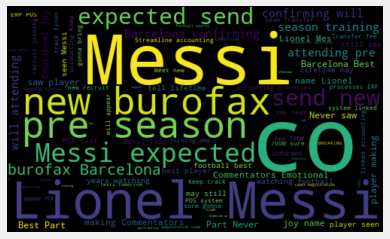

In [38]:
# Plot the Word Cloid
all_words = ' '.join( [twts for twts in df['Tweets']] )
word_cloud = WordCloud(width=500, height=300, random_state= 21, max_font_size=119).generate(all_words)

plt.imshow(word_cloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()

In [41]:
# Create a function to compute the negative, neutral and positive analysis

def analysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

# Adding new Column
df['Analysis'] = df['Polarity'].apply(analysis)

# Show DataFrame
df


,Tweets,Subjectivity,Polarity,Analysis
0,🚨New burofax incoming 💣💣 messi,0.000000,0.000000,Neutral
1,sacked their law firm for advising Messi on h...,0.550000,0.300000,Positive
2,: ☑️ 1xbet\n\nRegistration Code 👉5050\n\n*To g...,0.000000,0.000000,Neutral
3,": 🗣: ""Adjectives have been exhausted trying to...",0.700000,-0.400000,Negative
4,: Every Picture Has A Story...\nMessi \n🔟🐐 t.c...,0.000000,0.000000,Neutral
...,...,...,...,...
92,": Meet our new recruit at , joining our A&amp;...",0.671717,0.335227,Positive
93,The latest a life in black and white! t.co/OdJ...,0.383333,0.133333,Positive
94,: Football legends 🐐🐐\n\nmessi \nRonaldo \nfoo...,0.000000,0.000000,Neutral
95,❤ the best there ever was. The goat. Messi t.c...,0.300000,1.000000,Positive


In [43]:
# Print all of positive tweets
j = 1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') ' + sortedDF['Tweets'][i])
    print()
    j += 1

1)  sacked their law firm for advising Messi on how to terminate his contract with the club. Lol. 
Messi FCBarcelona football

2) 2020 is so unpredictable :
&gt; Psg finally had their first UCL final
&gt; Messi Leaving Barcelona
&gt; Pogba has not change… t.co/0RilC2nUaw

3) : Messi = Barcelona
The Best Part ♥️💔
•Never saw any player making Commentators Emotional out of joy.

The name Lionel Mes…

4) LEAKED! Footage reveals Manchester United's Ed Woodward live in action in the transfer market. 

ARSLIV… t.co/hcCrN4CWbE

5) : In 55 years watching football the best player I have seen is Messi.

I can tell you that in your lifetime you may still see a…

6) : Messi = Barcelona
The Best Part ♥️💔
•Never saw any player making Commentators Emotional out of joy.

The name Lionel Mes…

7) : Lionel Messi has announced he wants to leave. Here we take a look at some of his best moments for Barcelona. Simply the great…

8) : Lionel Messi is expected to send a new burofax to Barcelona confirming he w

In [44]:
# Print all of negative tweets
j = 1
sortedDF = df.sort_values(by=['Polarity'], ascending='False')
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') ' + sortedDF['Tweets'][i])
    print()
    j += 1

1) : 🗣: "Adjectives have been exhausted trying to describe Messi but there are plenty to describe this really sad, slow, painful…

2) Long play the king. Messi t.co/gDtXYTxjfQ

3) OFFICIAL: After a long discussion LeoMessi has finally decided to accept our proposal to join our hometown club FC… t.co/n1tA2bffuA

4)     Only Maradona would bring a mediocre team like… t.co/kdIZ4s7HSH

5) SOME RANDOM KILLS 🔥🔥 | PUBG MOBILE FUNNY MOMENTS 😂😂 | EPISODE 02 t.co/NYEeY5Z2Pf via  pubg… t.co/7gT2NjxDCK

6) Messi will not appear tomorrow for pre-season medical tests at training center. He keeps the decision to leave th… t.co/P4Bc4wwNoS

7) : A Barca fan cries in front of the stadium a sad sight 😢
FCBarcelona Messi 
 t.co/9QvOUbTSng

8) 🗣: "Adjectives have been exhausted trying to describe Messi but there are plenty to describe this really sad, slow,… t.co/1R4cw9YAyv

9) Leo_Messi 10 👑
Once you hear this name appear in front of you King..!!⚽️ of Football Not worth leaving this way H… t.co/RITHip8m75

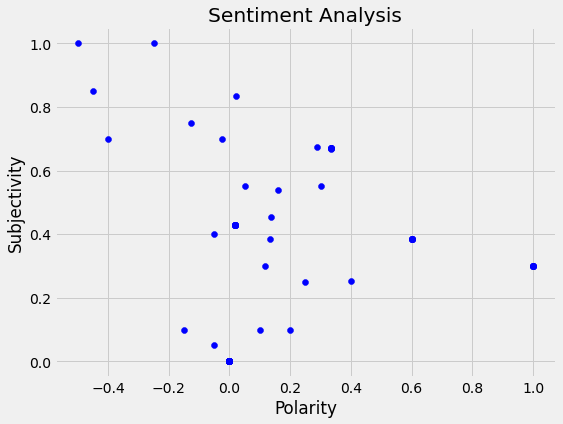

In [46]:
# Plot the polarity ans subjectivity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [47]:
# get the percentage of positive tweets

ptweet = df[df.Analysis == 'Positive']
ptweet = ptweet['Tweets']

round(ptweet.shape[0] / df.shape[0] * 100, 1)

53.6

In [49]:
# get the percentage of negative tweets

ntweet = df[df.Analysis == 'Negative']
ntweet = ntweet['Tweets']

round(ntweet.shape[0] / df.shape[0] * 100, 1)

9.3

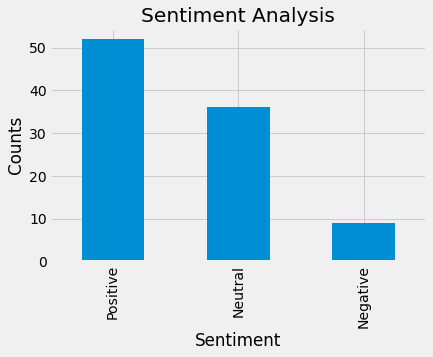

In [50]:
# Show the value counts

df['Analysis'].value_counts()

# Plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()